# Model Results

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mlflow
from mlflow.tracking import MlflowClient
import json

In [2]:
# Read the JSON file for MLflow configuration
with open('config.json', 'r') as file:
    config = json.load(file)

# Set the tracking URI
mlflow.set_tracking_uri(uri=f"http://{config['host']}:{config['port']}")
client = MlflowClient()

In [3]:
model_names = {
    "XGBoost": "Credit_Card_Approval_XGBoost",
    "RandomForest": "Credit_Card_Approval_RandomForest",
    "Neural Network": "Credit_Card_Approval_Neaural_Network",
    "Ensemble (Hard)": "Credit_Card_Approval_Ensemble_Hard",
    "Ensemble (Soft)": "Credit_Card_Approval_Ensemble_Soft"
}

all_metrics = {}

In [4]:
# Loop through each model, find its champion version, and get its logged metrics
for display_name, mlflow_name in model_names.items():
    try:
        print(f"Fetching metrics for {display_name}...")
        # Get the champion model version
        champion_version = client.get_model_version_by_alias(name=mlflow_name, alias="champion")
        
        # Get the run associated with this model version
        run = client.get_run(champion_version.run_id)
        
        # Extract the metrics
        metrics = run.data.metrics
        all_metrics[display_name] = metrics
    except Exception as e:
        print(f"Could not retrieve metrics for {display_name}: {e}")

# Create a DataFrame from the collected metrics
results = pd.DataFrame(all_metrics).T

Fetching metrics for XGBoost...
Fetching metrics for RandomForest...
Fetching metrics for Neural Network...
Fetching metrics for Ensemble (Hard)...
Fetching metrics for Ensemble (Soft)...


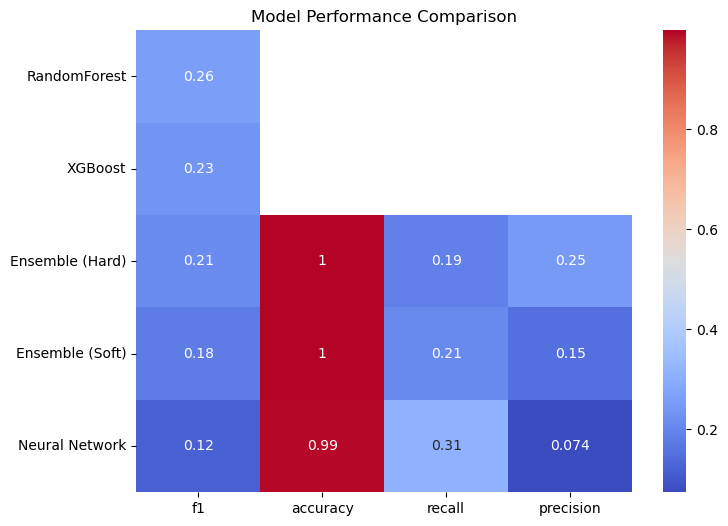

In [5]:
results = results.sort_values(by='f1', ascending=False)

# Generate the heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(results, annot=True, cmap="coolwarm")
plt.yticks(rotation=0)
plt.title("Model Performance Comparison")
plt.show()

# Skal omskrives!!!
We can conclude the following from the heatmap above:
- **RandomForest** prioritizes recall but sacrifices precision.
- **XGBoost** offers the highest precision and F1-score but struggles on the recall.
- **Neural Network** performs the weakest across all three metrics.
- **Ensemble model (hard voting)** and **Ensemble model (soft voting)** both offers the best overall balance, where the hard voting compared to the soft voting does a bit better on precision thus results in a higher f1 score. 

Further comments
- The **RandomForest** model achieves the highest recall (0.52), indicating that it is the most effective at capturing risky customers and predicts over half of them. However, it does very poorly on precision, which means it predict many good customers as risky. This is also reflected in the f1 score, which makes the model end in the bottom.
- The **XGBoost** model achieves the highest precision (0.4), meaning it predict fewer good customers as risky. However, it lacks on the recall, predicting the fewest amount of the risky customers (together with the **Neural Network**). The high precision does however make up for it resulting in the highest F1-score (0.27). 
- The two **Ensemble models** uses all the three models in the hope of using each models advantages to achieve something better. We can see that the two models recall is higher than the **XGBoost** and **Neural Network**, which could indicate that the **RandomForest**-model came into play here. The **Ensemble models** did also better on the precision than then **RandomForest** and **Neural Network**, which could indicate that the **XGBoost**-model helped out here. However, it was not enough to get a better f1 score than the **XGBoost** but they did perform more balanced and did not sacrifice more on one parameter.

All in all none of the models did very well and further experimentation could improve the performance. 
